CHALLENGE 4

USING CLUSTERING MODELS 

K-MEANS & HIERARCHICAL 

In [1]:
import pandas as pd
cluster_data = pd.read_csv('/Users/hiro0x/Documents/GitHub/microsoft-ai/cluster_models/clusters.csv')
cluster_data.sample(10)


,A,B,C
982,2.276257,2.667525,1.465224
334,3.676768,2.398964,1.871437
569,3.586929,3.168780,3.516863
295,3.793915,2.829522,3.387768
864,2.631499,3.470307,2.840858
722,-0.620953,-0.497436,-1.239371
739,2.607581,3.090913,2.999687
501,0.910219,1.493452,1.975177
195,1.407642,0.759656,1.112634
491,2.705733,3.223844,4.084935


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

Use PCA to create a 2D version of the features for visualization

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# normalize
scaled_features = MinMaxScaler().fit_transform(cluster_data)

# get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]


array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

VISUALIZE

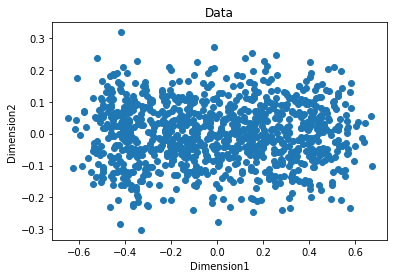

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.title('Data')
plt.show()



CALCULATE WCSS FOR MULTIPLE CLUSTER NUMBERS TO DETERMINE OPTIMAL # OF CLUSTERS

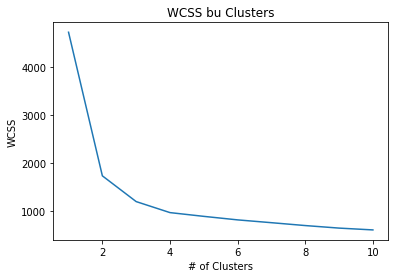

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# create 10 models, with 1 -> clusters 

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cluster_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('WCSS bu Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()




In [5]:
from sklearn.cluster import KMeans

# create model based on 4 centroids

model = KMeans(n_clusters=4, init='k-means++', n_init=500, max_iter=1500)
# fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(cluster_data)
# view th cluster asignments 
km_clusters


array([1, 1, 3, 3, 1, 1, 3, 0, 1, 1, 3, 2, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0,
       1, 1, 0, 2, 3, 1, 2, 0, 2, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 2,
       3, 1, 1, 3, 3, 0, 1, 2, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 3, 2, 0, 0, 3, 2, 0, 0, 0, 1, 2, 0, 2, 3, 2, 0, 3, 2, 0,
       0, 2, 2, 2, 3, 0, 2, 0, 3, 0, 3, 2, 0, 2, 3, 2, 0, 2, 3, 0, 0, 3,
       0, 2, 1, 1, 2, 3, 2, 3, 1, 2, 0, 2, 3, 3, 1, 0, 2, 0, 3, 1, 2, 2,
       2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 3, 3, 0, 3, 0, 0, 3, 1, 1, 0,
       1, 2, 1, 0, 0, 0, 2, 1, 3, 3, 0, 2, 2, 1, 1, 3, 1, 2, 0, 3, 0, 2,
       2, 0, 0, 1, 0, 1, 2, 2, 0, 3, 1, 3, 3, 2, 2, 1, 2, 0, 3, 2, 0, 0,
       1, 3, 2, 3, 3, 3, 1, 1, 3, 0, 3, 1, 3, 3, 2, 1, 3, 0, 0, 3, 1, 3,
       0, 1, 2, 3, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 3, 3, 1, 3, 2, 3, 2,
       3, 0, 0, 2, 3, 1, 1, 0, 3, 0, 2, 2, 3, 3, 3, 1, 3, 1, 0, 3, 3, 0,
       1, 0, 2, 2, 2, 0, 3, 1, 0, 2, 1, 2, 3, 0, 0, 1, 3, 3, 2, 1, 1, 3,
       3, 2, 3, 1, 1, 2, 1, 3, 3, 3, 0, 0, 2, 1, 3,

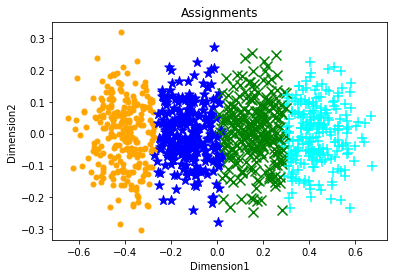

In [9]:
# plot the clusters 

def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'cyan', 2:'green', 3:'orange'}
    mrk_dic = {0:'*', 1:'+', 2:'x', 3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color=colors[sample], marker = markers[sample], s=100)

    plt.xlabel('Dimension1')
    plt.ylabel("Dimension2")
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [10]:
# try agglomerative clustering 

from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(cluster_data)
agg_clusters

array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

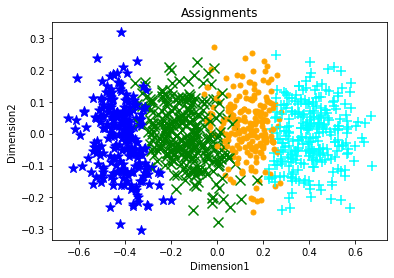

In [11]:
plot_clusters(features_2d, agg_clusters)